# 4. Методы классфикации: Деревья решений

Алгоритм строит модель в виде древовидной структуры. Каждый внутренний узел дерева проверяет определенный признак, каждая ветвь $-$ результат проверки, а каждый лист $-$ метка класса.

![](https://www.insidealgorithms.com/wp-content/uploads/2024/05/decision-tree-featured_image-1024x576.png.webp)

Начиная с корня, дерево задает вопросы о признаках объекта. В зависимости от ответа объект спускается по соответствующей ветви до тех пор, пока не достигнет листа, который и укажет предсказанный класс.

Плюсы:
- Интерпретируемость

Минусы:
- Легко переобучается (нужны ограничения глубины, pruning)

## Пример

Попробуем классифицировать животных по двум признакам: "Имеет перья?" и "Умеет летать?".

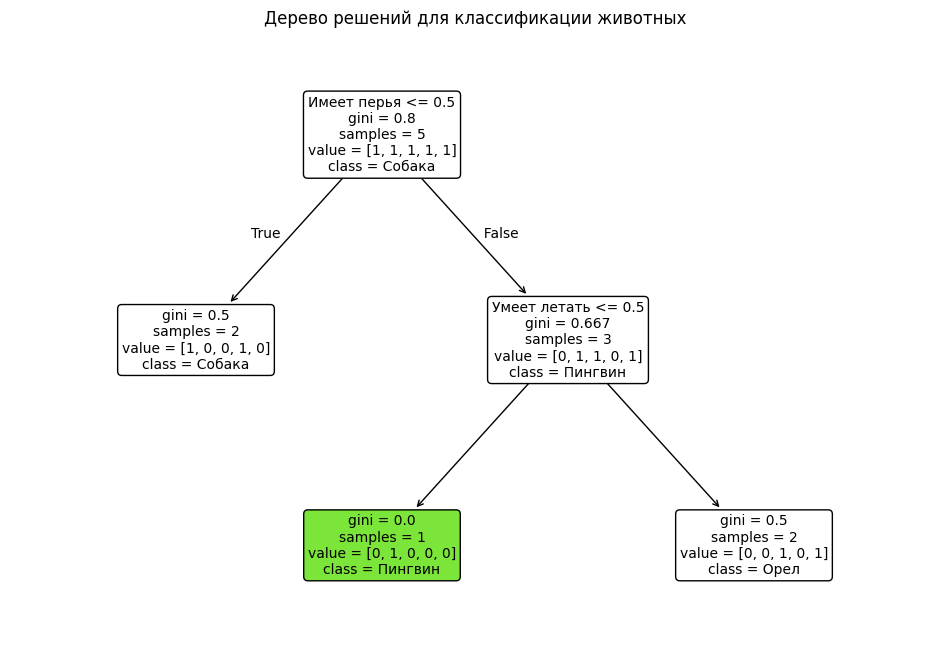

In [6]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

# Данные: [Имеет_перья, Умеет_летать]
features = [[0, 0], [1, 0], [1, 1], [0, 0], [1, 1]] # 0 - Нет, 1 - Да
labels = ['Собака', 'Пингвин', 'Орел', 'Кот', 'Попугай'] # Метки классов

# Преобразуем в pd.Series перед факторизацией
label_series = pd.Series(labels)
label_ids, unique_labels = pd.factorize(label_series)

# Обучаем модель
clf = tree.DecisionTreeClassifier()
clf.fit(features, label_ids)

# Визуализируем дерево
plt.figure(figsize=(12, 8))
tree.plot_tree(clf,
               feature_names=['Имеет перья', 'Умеет летать'],
               class_names=unique_labels,
               filled=True,
               rounded=True,
               fontsize=10)
plt.title("Дерево решений для классификации животных")
plt.show()

gini (коэффициент Джини/примесь Джини) $-$ это критерий разделения в деревьях решений, который измеряет "нечистоту" или "неоднородность" узла
- gini = 0 $-$ идеально чистый узел (все объекты одного класса)
- gini = 0.5 (для бинарной классификации) $-$ максимально нечистый узел (равное распределение классов)

Чем меньше Gini, тем лучше разделение

# Ссылки для дальнейшего изучения

Документация и учебники:
- Матрица ошибок и метрики: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
- Метрики классификации (sklearn): https://scikit-learn.org/stable/modules/model_evaluation.html
- [scikit-learn / Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html) - документация по kNN
- [scikit-learn / Decision Trees](https://scikit-learn.org/stable/modules/tree.html) - документация по деревьям решений